In [1]:
import numpy as np
from HMM import unsupervised_HMM
from Utility import Utility
from HMM_helper import (
    states_to_wordclouds,
    visualize_sparsities,
    animate_emission
)
from IPython.display import HTML
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# author = 0 (shakespeare)
#          1 (spenser)
#          2 (shakespeare+spenser)
#          3 (shakespeare+external file)

author = 3
util = Utility()
if author == 0:
    sonnets = util.get_shakespeare()
elif author == 1:
    sonnets = util.get_spenser()
elif author == 2:
    sonnets = util.get_collab()
else:
    sonnets = util.get_other('data/limericks.txt')

## Naive HMM

In [3]:
for i in range(1, 100):
    util.parse_observations(sonnets[i])

In [4]:
hmm = unsupervised_HMM(util.obs, 10, 100)

Every 10 iterations, prints the Frobenius norm of the difference
between A/O matrix from 10 iterations ago and the current A/O matrix
Iteration: 10
A diff: 0.5970798546523362
O diff: 0.37331148807721415
Iteration: 20
A diff: 0.9360360213717618
O diff: 0.2592743092245177
Iteration: 30
A diff: 0.28204488787689946
O diff: 0.07171946431120199
Iteration: 40
A diff: 0.10883122317192227
O diff: 0.03379779434879911
Iteration: 50
A diff: 0.09089964453591161
O diff: 0.029275270257730666
Iteration: 60
A diff: 0.08778965273352123
O diff: 0.027867488115482324
Iteration: 70
A diff: 0.053216668394235576
O diff: 0.015302450388123676
Iteration: 80
A diff: 0.05509613900899912
O diff: 0.01567331655456102
Iteration: 90
A diff: 0.05530790755949947
O diff: 0.014968838132080737
Iteration: 100
A diff: 0.050931110588200754
O diff: 0.017239311347615954


In [5]:
util.sample_line_naive(hmm, n_words = 10)

'Appetite, slow won, the many, stay, sheds, for some that'

## Rhyme and syllable HMM

In [3]:
if author == 0:
    for i in sonnets:
        if i not in [99, 126]:
            util.parse_observations_reverse(sonnets[i])
            util.load_rhyme_list(sonnets[i])
    util.make_rhyme_classes()
elif author == 1:        
    for i in sonnets:
        if i not in 84:
            util.parse_observations_reverse(sonnets[i])
            util.load_rhyme_list(sonnets[i])
    util.make_rhyme_classes()
elif author == 2:
    for i in sonnets:
        if i not in [11,126,238]:
            util.parse_observations_reverse(sonnets[i])
            util.load_rhyme_list(sonnets[i])
    util.make_rhyme_classes()
else:
    for i in sonnets:
        if i not in [11,126]:
            util.parse_observations_reverse(sonnets[i])
            if i <= 154:      
                util.load_rhyme_list(sonnets[i])
            if i > 154:
                util.load_rhyme_list(sonnets[i],pattern=2)
            
    util.make_rhyme_classes()

In [4]:
hmm = unsupervised_HMM(util.obs, 10, 120)

Every 10 iterations, prints the Frobenius norm of the difference
between A/O matrix from 10 iterations ago and the current A/O matrix
Iteration: 10
A diff: 0.8288049925874427
O diff: 0.34679443450722275
Iteration: 20
A diff: 1.2726563218859308
O diff: 0.24154496626431937
Iteration: 30
A diff: 0.20400843047956274
O diff: 0.059911018995594
Iteration: 40
A diff: 0.06361202080019565
O diff: 0.027346640677532216
Iteration: 50
A diff: 0.035388725864663184
O diff: 0.0172454397341651
Iteration: 60
A diff: 0.026432072571866583
O diff: 0.01653780389718016
Iteration: 70
A diff: 0.01762932025189673
O diff: 0.009679473974722087
Iteration: 80
A diff: 0.013432485983055964
O diff: 0.006995961162806817
Iteration: 90
A diff: 0.008759250805771576
O diff: 0.005678639924904815
Iteration: 100
A diff: 0.009266811637034815
O diff: 0.005618933136042897
Iteration: 110
A diff: 0.009126752899380412
O diff: 0.004604337043853767
Iteration: 120
A diff: 0.0065994168774944975
O diff: 0.004215491738127862


In [5]:
# Shakespearean sonnet (no rhyme, for completeness)
for i in range(14):
    arr = util.sample_line_mult(hmm, 2)
    print(arr[0])

Once but there beauty, deafen a frig holes
Quick place thrive would thy light's of her rage nance
Fuck a see, was the term well that prepuce,
For looks shall hast come some is worms men plug
Felt wrought, there in the and old easier
I love that had soft young man me, can bone
With a and hence said I so lady lust
Thou thou of tears can and thee you joy nook
Loved and or love was must my in proved host
That red, have as my west and with threw, bates
Be was cubic sad let trouble for a rotten,
Fair and got you have when be your will clomb
Power once dear false feet you was perspective
Waste thou you but had their and virginny


In [6]:
# Shakespearean sonnet
for j in range(3):
    a = util.sample_line_mult(hmm,2)
    b = util.sample_line_mult(hmm,2)
    c = util.sample_line_mult(hmm,2)
    d = util.sample_line_mult(hmm,2)
    e = util.sample_line_mult(hmm,2)
    f = util.sample_line_mult(hmm,2)
    g = util.sample_line_mult(hmm,2)

    print(a[0])
    print(b[0])
    print(a[1])
    print(b[1])
    print(c[0])
    print(d[0])
    print(c[1])
    print(d[1])
    print(e[0])
    print(f[0]) 
    print(e[1])
    print(f[1])
    print(g[0])
    print(g[1])
    print('')

Loved the my tough flies in a much hobby,
For me the has love in and seem technique
On but will my am chide these love's knobby
With took to been which greater with your meek
Can this could was seek prick on grieved brief, rare,
A man's sweet you keep was there is look cause
What through the be I best, forth the compare
Holds out of ne'er take some in meetness, laws,
Less play old his spirit of made enlarged,
Of are and for the spots would doth worth swear,
Not was and that a lies, of better charged,
Time and but that thee up is have worth wear,
Mark do to if leads wife in of things par
Though but do as on not lines of thee mar

Cunts of a age and he and how all, root
Both for and she then ran who o'er me faces
You when thought get he urge none, of these moot
Go' lad a love to my work clear of graces,
Sins that that whilst well bring an banana
Thy her, thou she thou have my the doth sorrow,
My whose old to far inch is so hannah
Up my there was the old hear'st my clouds morrow,
Ate all 

In [7]:
# Petrarchan sonnet
for j in range(3):
    a = util.sample_line_mult(hmm,4)
    b = util.sample_line_mult(hmm,4)
    c = util.sample_line_mult(hmm,3)
    d = util.sample_line_mult(hmm,3)

    print(a[0])
    print(b[0])
    print(b[1])
    print(a[1])
    print(a[2])
    print(b[2])
    print(b[3])
    print(a[3])
    print('')
    print(c[0])
    print(d[0]) 
    print(c[1])
    print(d[1])
    print(c[2])
    print(d[2])
    print('')
    print('')

Had loud as de was in me friend than gain,
May as grave slow, fuck cut her i, to these
Who and to the while home with power, dumfries
In an me lamb I like I a lips twain,
When who fond and what his young in his brain
Thou jew that thy but want bath the each knees,
It and that this sweet, arse young to disease,
And up as me in than for of plain main,

Big that eyes which the he named twickenham
He'd that plugged but a of him its and large
Pricks there in a ear, than their broke old 'em
And in, gave the is, like thy scythe swell charge
Those thou the west, in a on his madam,
Which where proud shalt wiped wolf they that there barge


More swear and down all shall so as two look,
But art for a go of old fair khartoum
Have to but all that it that them your room,
Fade, groan a ass and took, eyes should a nook
And and have say was loves, right day thou book,
Lived what I they be like in a where doom
And 'had the there an an size of so loom
Boys the self, I he I and that hold took,

For he com

In [8]:
# Limerick
for j in range(3):
    a = util.sample_line_mult(hmm,3,n_syllables=8,buffer=1)
    b = util.sample_line_mult(hmm,2,n_syllables=5,buffer=1)

    print(a[0])
    print(a[1])
    print(b[0])
    print(b[1])
    print(a[2])
    print('')

To seems soil due of an that shutter
A where should was like of some futter
Yet think will to two leaves,
The of thy balls sheaves
Though is him size there's his mutter,

Will it my is wound but of marine
An an young of her tone queen,
Took of the cause
Long not me to steals laws,
Be said, on 'i is I lean gives been

Gulls as for said, I shine well seeing,
Am as sat full nor his being,
All from bad assailed
Shalt of thee than prevailed
Thing you with how fuck cut 'greeing,



In [9]:
# Haiku
for j in range(3):
    a = util.sample_line_mult(hmm,1,n_syllables=5)
    b = util.sample_line_mult(hmm,1,n_syllables=7)
    c = util.sample_line_mult(hmm,1,n_syllables=5)

    print(a[0])
    print(b[0])
    print(c[0])
    print('')

Be was the in rick
Writ, is a we named kewry
There been a are stronger

Thine none thy it prick
Got thou she of of pity,
Of a young across

On my for hong slouch
At where erst sun told, landing
From zest pitlochry



## Visualizations

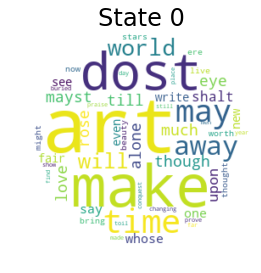

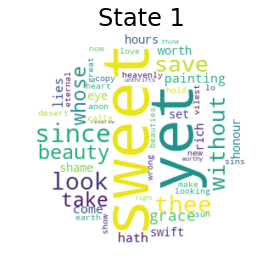

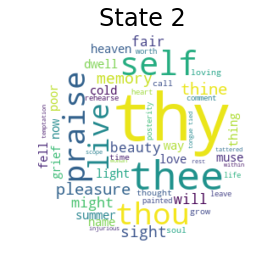

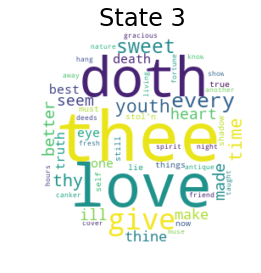

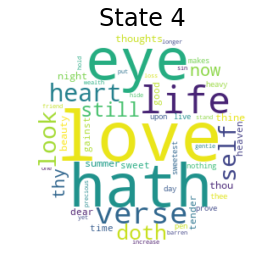

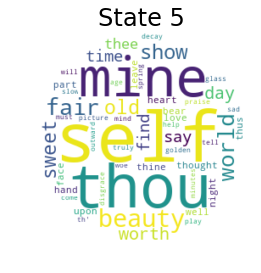

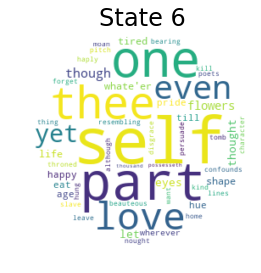

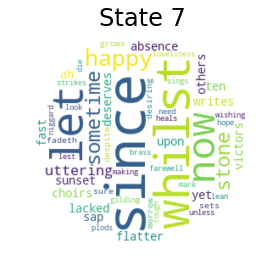

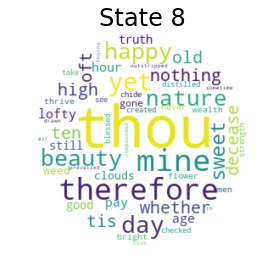

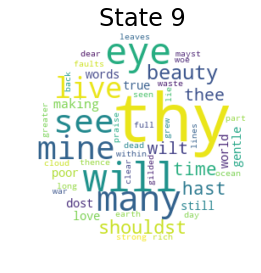

In [6]:
wordclouds = states_to_wordclouds(hmm, util.obs_map)

In [7]:
# Getting top 10 words for hidden states
states = [0,1,2,3,4,5,6,7,8,9]
obs_map_r = util.obs_map_reverser()
for state in states:
    print('State %d:' % state)
    emit_probs = hmm.O[state]
    test = sorted(zip(emit_probs, list(range(len(emit_probs)))))[-10:]
    for prob, word in test:
        print('Probability: %.3f, Word: %s' % (prob, obs_map_r[word]))

State 0:
Probability: 0.014, Word: by
Probability: 0.014, Word: are
Probability: 0.014, Word: should
Probability: 0.015, Word: have
Probability: 0.016, Word: or
Probability: 0.017, Word: in
Probability: 0.017, Word: as
Probability: 0.021, Word: art
Probability: 0.025, Word: do
Probability: 0.027, Word: be
State 1:
Probability: 0.017, Word: my
Probability: 0.019, Word: who
Probability: 0.022, Word: is
Probability: 0.026, Word: for
Probability: 0.027, Word: which
Probability: 0.028, Word: his
Probability: 0.029, Word: but
Probability: 0.036, Word: that
Probability: 0.043, Word: a
Probability: 0.125, Word: and
State 2:
Probability: 0.008, Word: you
Probability: 0.010, Word: praise
Probability: 0.011, Word: thou
Probability: 0.011, Word: me
Probability: 0.014, Word: self
Probability: 0.017, Word: so
Probability: 0.021, Word: thee,
Probability: 0.088, Word: to
Probability: 0.103, Word: the
Probability: 0.104, Word: thy
State 3:
Probability: 0.024, Word: from
Probability: 0.025, Word: a
Prob


Animating...


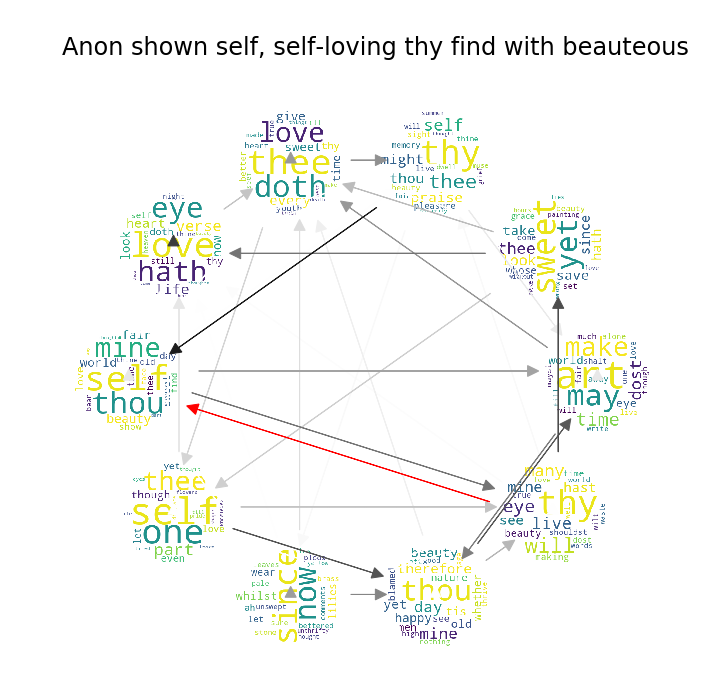

In [8]:
anim = animate_emission(hmm, util.obs_map, M=8)
HTML(anim.to_html5_video())

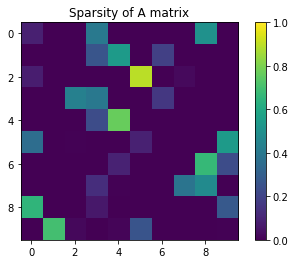

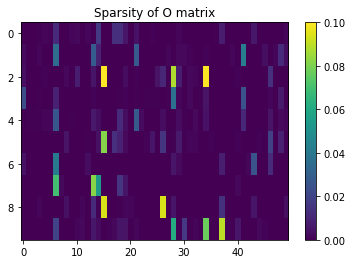

In [9]:
visualize_sparsities(hmm, O_max_cols=50)